In [1]:
import torch
import torchvision.transforms as transforms
import torchvision.models as models
import torch.nn as nn
import torch.optim as optim
import numpy as np
import time
import copy
from sklearn.model_selection import train_test_split
import pandas as pd
from PIL import Image
from sklearn.metrics import confusion_matrix
import sys
import torchvision
import matplotlib
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
path = 'MyDrive/1-Polymtl/CodeML-2023/'

In [4]:
data_path = "/content/drive/MyDrive/1-Polymtl/CodeML-2023/data/EmotionDetection/"


In [8]:
from PIL import Image
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

import torch
import torchvision.transforms as T


plt.rcParams["savefig.bbox"] = 'tight'
orig_img = Image.open(data_path+ 'files/43484.jpg')
# if you change the seed, make sure that the randomly-applied transforms
# properly show that the image can be both transformed and *not* transformed!
torch.manual_seed(0)


def plot(imgs, with_orig=True, row_title=None, **imshow_kwargs):
    if not isinstance(imgs[0], list):
        # Make a 2d grid even if there's just 1 row
        imgs = [imgs]

    num_rows = len(imgs)
    num_cols = len(imgs[0]) + with_orig
    fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, squeeze=False)
    for row_idx, row in enumerate(imgs):
        row = [orig_img] + row if with_orig else row
        for col_idx, img in enumerate(row):
            ax = axs[row_idx, col_idx]
            ax.imshow(np.asarray(img), cmap="gray",**imshow_kwargs)
            ax.set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

    if with_orig:
        axs[0, 0].set(title='Original image')
        axs[0, 0].title.set_size(8)
    if row_title is not None:
        for row_idx in range(num_rows):
            axs[row_idx, 0].set(ylabel=row_title[row_idx])

    plt.tight_layout()

0 Resize(size=(48, 48), interpolation=bilinear, max_size=None, antialias=warn)
1 RandomHorizontalFlip(p=0.25)
2 AutoAugment(policy=AutoAugmentPolicy.IMAGENET, fill=None)
3 RandAugment(num_ops=2, magnitude=9, num_magnitude_bins=31, interpolation=InterpolationMode.NEAREST, fill=None)
4 RandomPerspective(p=0.5)
5 ColorJitter(brightness=(0.5, 1.5), contrast=(0.5, 1.5), saturation=(0.5, 1.5), hue=(-0.5, 0.5))
6 GaussianBlur(kernel_size=(5, 5), sigma=(0.1, 2.0))
7 RandomAffine(degrees=[0.0, 360.0], translate=(0.1, 0.3))


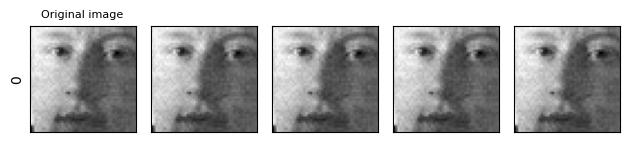

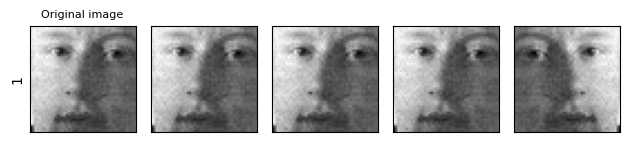

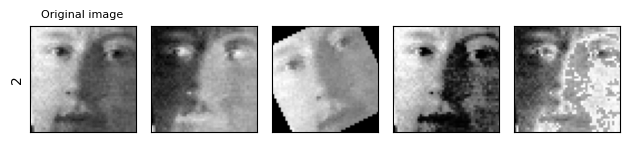

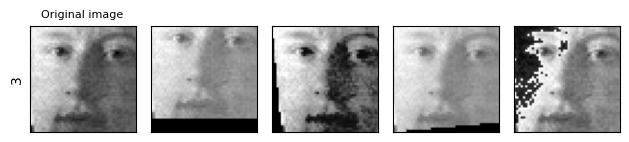

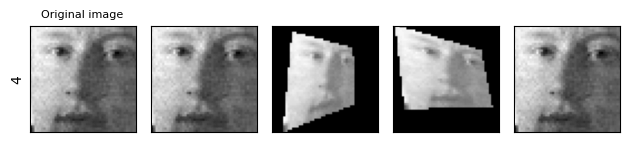

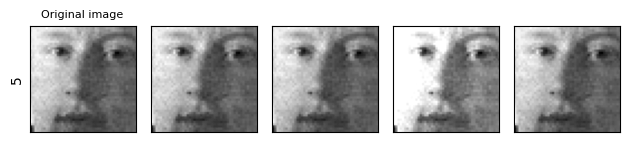

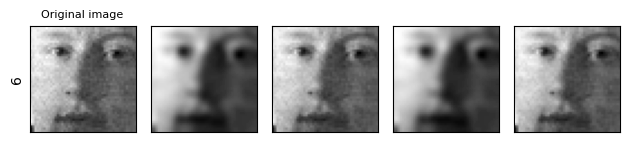

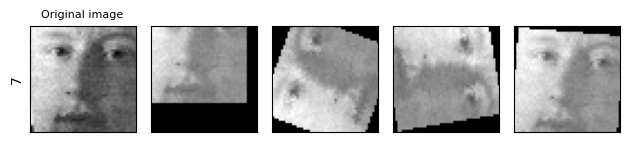

In [16]:
transformations = [
                transforms.Resize((48, 48)),
                transforms.RandomHorizontalFlip(p=0.25),
                transforms.AutoAugment(),
                transforms.RandAugment(),
                transforms.RandomPerspective(),
                transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5, hue=0.5),
                transforms.GaussianBlur(kernel_size=5),
                transforms.RandomAffine(degrees=(0, 360), translate=(0.1, 0.3))

            ]
for i,transform in enumerate(transformations):
  print(i,transform)
  transformed_imgs = [transform(orig_img) for _ in range(4)]
  plot(transformed_imgs,row_title=f"{i}")